<a href="https://colab.research.google.com/github/brunacustoodio/An-lise-de-Vendas/blob/main/An%C3%A1lise_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A base de dados utilizada para análise de dados foi "theLook eCommerce" é uma coleção de conjuntos de dados que reúne informações históricas de um eCommerce, abrangendo diversas categorias como produtos, vendas, clientes, entre outros. Essa base de dados é projetada para oferecer uma visão abrangente do funcionamento do eCommerce, permitindo análises e insights valiosos sobre o comportamento dos clientes, desempenho de produtos e tendências de vendas ao longo do tempo.






In [ ]:
!pip install google-cloud-bigquery

Bibliotecas necessárias

In [1]:
from google.cloud import bigquery
from google.oauth2 import service_account
import pandas as pd
import matplotlib.pyplot as plt


Autenticação no BigQuery usando as credenciais de serviço fornecidas no arquivo JSON e especificando o ID do projeto.



In [ ]:
credentials = service_account.Credentials.from_service_account_file('/content/my-project-82471-1698102235390-192fda3bc34f.json')
project_id = 'my-project-82471-1698102235390'
client = bigquery.Client(credentials= credentials,project=project_id)

Realiza uma consulta para obter os 10 primeiros registros da tabela products no conjunto de dados

In [ ]:
query = client.query(
    """
    SELECT * FROM
    `bigquery-public-data.thelook_ecommerce.products`
    LIMIT 10
    """)
results = query.result()
for row in results:
	print(row)

Row((13842, 2.518749990849756, 'Accessories', 'Low Profile Dyed Cotton Twill Cap - Navy W39S55D', 'MG', 6.25, 'Women', 'EBD58B8A3F1D72F4206201DA62FB1204', 1), {'id': 0, 'cost': 1, 'category': 2, 'name': 3, 'brand': 4, 'retail_price': 5, 'department': 6, 'sku': 7, 'distribution_center_id': 8})
Row((13928, 2.3383499148894105, 'Accessories', 'Low Profile Dyed Cotton Twill Cap - Putty W39S55D', 'MG', 5.949999809265137, 'Women', '2EAC42424D12436BDD6A5B8A88480CC3', 1), {'id': 0, 'cost': 1, 'category': 2, 'name': 3, 'brand': 4, 'retail_price': 5, 'department': 6, 'sku': 7, 'distribution_center_id': 8})
Row((14115, 4.879559879379869, 'Accessories', 'Enzyme Regular Solid Army Caps-Black W35S45D', 'MG', 10.989999771118164, 'Women', 'EE364229B2791D1EF9355708EFF0BA34', 1), {'id': 0, 'cost': 1, 'category': 2, 'name': 3, 'brand': 4, 'retail_price': 5, 'department': 6, 'sku': 7, 'distribution_center_id': 8})
Row((14157, 4.648769887297898, 'Accessories', 'Enzyme Regular Solid Army Caps-Olive W35S45D (

A consulta extrai o ano e mês da data de criação de pedidos (created_at) e calcula o total de vendas (SUM(oi.sale_price)) para cada mês. A consulta resulta em um conjunto de dados que é armazenado na variável sales_query.

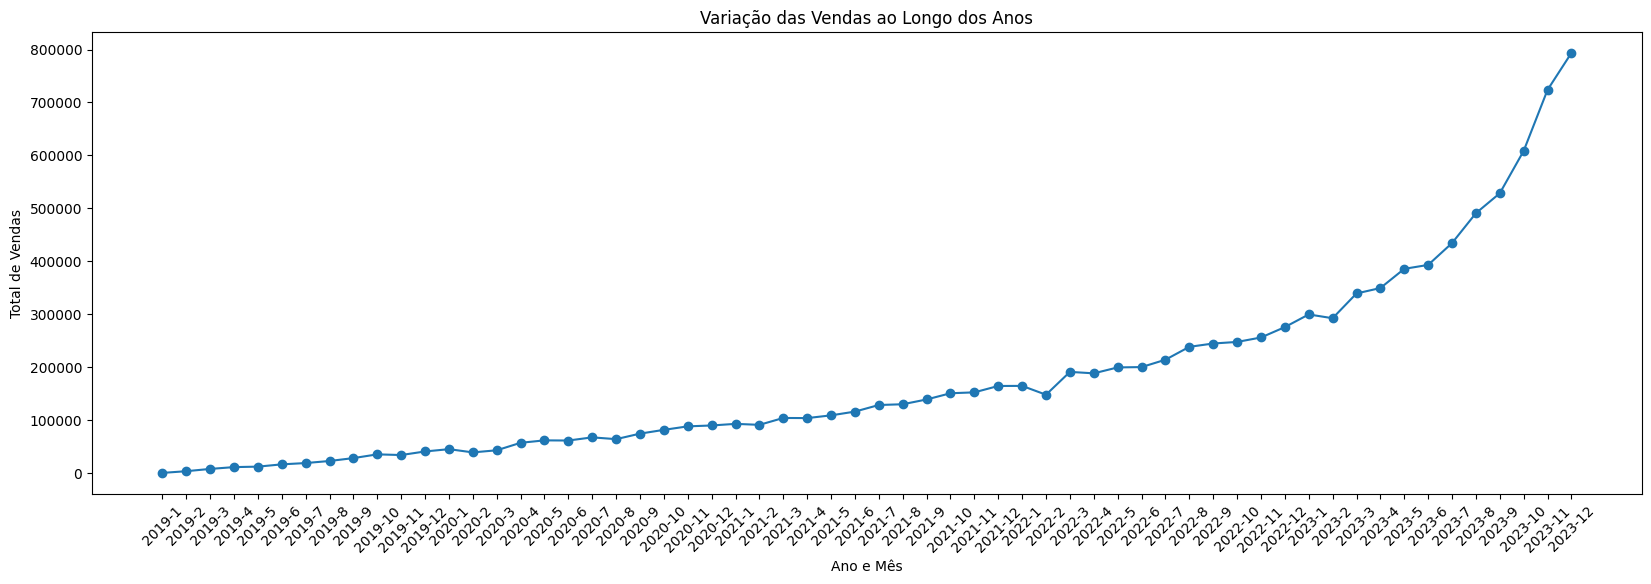

In [ ]:

# Consulta para obter informações sobre as vendas
sales_query = client.query(
    """
    SELECT
        EXTRACT(YEAR FROM o.created_at) AS ano,
        EXTRACT(MONTH FROM o.created_at) AS mes,
        SUM(oi.sale_price) AS total_vendas
    FROM
        `bigquery-public-data.thelook_ecommerce.orders` AS o
    JOIN
        `bigquery-public-data.thelook_ecommerce.order_items` AS oi
    ON
        o.order_id = oi.order_id
    JOIN
        `bigquery-public-data.thelook_ecommerce.inventory_items` AS ii
    ON
        oi.inventory_item_id = ii.id
    GROUP BY
        ano, mes
    ORDER BY
        ano, mes
    """
)

# Executa a consulta e converte os resultados para um DataFrame do Pandas
sales_results = sales_query.result()
sales_df = pd.DataFrame(sales_results.to_dataframe())

# Cria um gráfico para visualizar as vendas ao longo do tempo
plt.figure(figsize=(20, 6))
plt.plot(sales_df['ano'].astype(str) + '-' + sales_df['mes'].astype(str), sales_df['total_vendas'], marker='o')
plt.title('Variação das Vendas ao Longo dos Anos')
plt.xlabel('Ano e Mês')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.show()